In [78]:
import scipy.io as sio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from knn_graph import knn_graph
from spectral import spectral
from sklearn.cluster import KMeans
from utils import *
from bestMap import bestMap
from sklearn.metrics import mutual_info_score

warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Spectral Exp 1

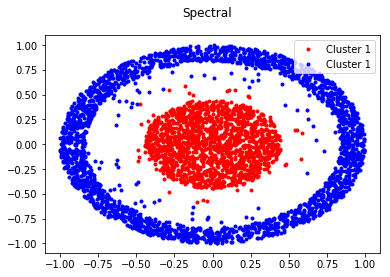

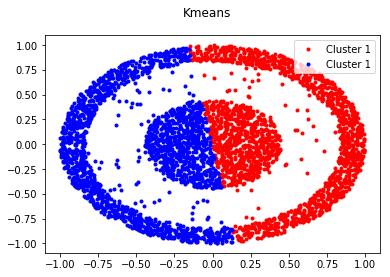

In [174]:
data = sio.loadmat('data/cluster_data.mat')
X = data['X']

k_in_knn_graph = 200
threshold = 0.5

plt.figure()
plt.suptitle("Spectral")
W = knn_graph(X, k_in_knn_graph, threshold)
idx = spectral(W, 2)
cluster_plot(X, idx)

plt.figure()
plt.suptitle("Kmeans")
idx = KMeans(2).fit(X).labels_
cluster_plot(X, idx)

# Spectral exp 2

In [92]:
data = sio.loadmat('data/TDT2_data.mat')
# X = data['X']
fea = data['fea']
gnd = data['gnd'].flatten()
W = sio.loadmat('data/W_data.mat')['W']

In [122]:

repeat = 100
AC1 = 0.0
MIhat1 = 0.0
AC2 = 0.0
MIhat2 = 0.0

idx = spectral(W,5)
gnd_idx = bestMap(idx,gnd);
AC1 = AC1 + np.sum(gnd_idx == idx)/gnd_idx.shape[0]
MIhat1 = MIhat1 + mutual_info_score(gnd_idx,idx)

In [ ]:
repeat = 20
AC1 = 0.0
MIhat1 = 0.0
AC2 = 0.0
MIhat2 = 0.0
for i in range(repeat):
    idx = spectral(W,5)
    gnd_idx = bestMap(idx,gnd);
    AC1 = AC1 + np.sum(gnd_idx == idx)/gnd_idx.shape[0]
    MIhat1 = MIhat1 + mutual_info_score(gnd_idx,idx)

    idx = KMeans(n_clusters=5).fit(fea).labels_
    gnd_idx = bestMap(idx,gnd)
    AC2 = AC2 + np.sum(gnd_idx == idx)/gnd_idx.shape[0]
    MIhat2 = MIhat2 + mutual_info_score(gnd_idx,idx)
    
AC1 = AC1/repeat
MIhat1 = MIhat1/repeat
AC2 = AC2/repeat
MIhat2 = MIhat2/repeat

In [126]:
print('For the spectral clustering, the accuracy is %f and the normalized mutual information is %f\n'%(AC1, MIhat1))
print('For the k-means clustering, the accuracy is %f and the normalized mutual information is %f\n'%(AC2, MIhat2))

For the spectral clustering, the accuracy is 0.828620 and the normalized mutual information is 0.745642

For the k-means clustering, the accuracy is 0.498180 and the normalized mutual information is 0.447074

